#### Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. 

![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access a file which was made using the standard [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine. We also need some tools to access and manipulate this file:-

- [ ] UpRoot (https://uproot.readthedocs.io/en/latest/)
- [ ] Awkward (https://pypi.org/project/awkward/)
- [ ] wget (https://pypi.org/project/wget/)
- [ ] matplotlib for plotting!
- [ ] Scipy for fitting (https://scipy.org/)

In [2]:
#run this once and update for future packages you may use
%pip install uproot awkward wget matplotlib scipy
# This will also install other packages needed (xxhash, numpy, etc.) - handy.

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Notice, we got a warning that these files were installed in a weird location (since packages is not writable)
# Let's fix it! We just add the directory it installed them to, to the place Python looks for packages. Simples.
!PATH=/home/jovyan/.local/bin$PATH
!echo $PATH

/usr/bin:/Users/nataliapaunova/Library/Python/3.9/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin


In [4]:
import awkward,uproot

All being well - this should give no errors.... do not try to proceed if you get errors in the above cell.

The next step is to get our data file - you can find it on Canvas here: https://canvas.maastrichtuniversity.nl/courses/21975/files/4933459/download?download_frd=1

Then upload it directly. You can also run the following:

In [5]:
# import wget
# url='http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root'
# download=wget.download(url)
# !mkdir LHCb_Data && mv B2HHH_MagnetUp.root ./LHCb_Data/B2HHH_MagnetUp.root
# # If we ALL do this too often, CERN will block our IP address....

In [6]:
#Since we need to use Uproot to load our file and awkward to handle it, we must first import this into Python:
#We already did this above, it does not hurt to do it again, and if you make a new notebook in future remember this step
import uproot, awkward, numpy as np

#Then we open the ROOT file using the open command. - note you need to make this file path correct for your own setup!
f = uproot.open("B2HHH_MagnetDown.root")

#From our file, we have to extract the DecayTree
f.keys()

['DecayTree;1']

In [7]:
#It tells us there is one key, it's called DecayTree. Let's look inside:
f["DecayTree"].show()

#You can also use keys() again to see them all...
f["DecayTree"].keys()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [8]:
#Now it shows us all the variables inside, their type and so on
#Let's load one (The x-momentum of Hadron 1) 'H1_PX' variable in an awkward array:
data=f["DecayTree/H1_PX"].array()

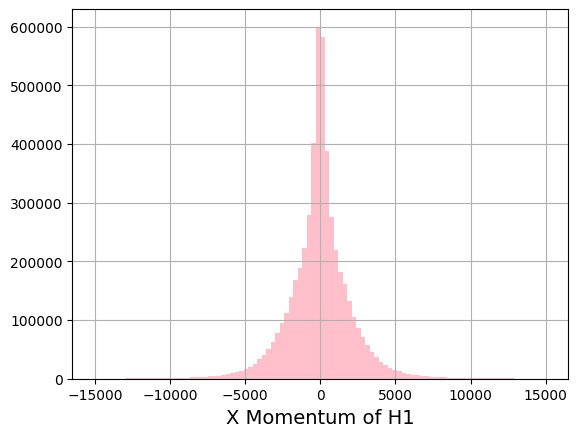

In [9]:
#lets plot something!
import matplotlib.pylab as plt

# make a place to plot something
plt.figure();
plt.hist (data, bins=100, range=(-15000,15000), color = 'pink');
plt.grid(True)
plt.xlabel('X Momentum of H1', fontsize = 14);

<font color="red"> <ins> If you got here before Chris did the general introduction - please *STOP* take a coffee and then let's go ahead when everyone is together and back in the room </ins> </font>

# Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce many things. In this analysis we are interested in events that take place when we have either particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are ~524~ 630 [documented](https://pdg.lbl.gov/2022/listings/rpp2022-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon, Muon or a Pion), **not** the B-meson - the mother particle. Normally we would have to do some reconstruction from the decay products (the Daughters) to the Mother to be able to make some conclusions. As we know there is a H2 and H3 referring to the 2nd and 3rd daughters in this decay.

Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We have combined these into a variable...perhaps called H1_Ptot?

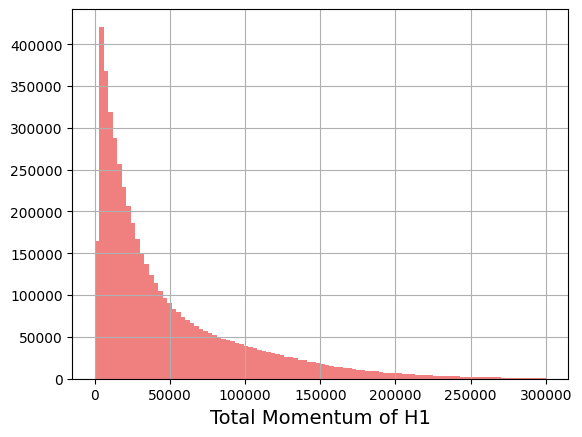

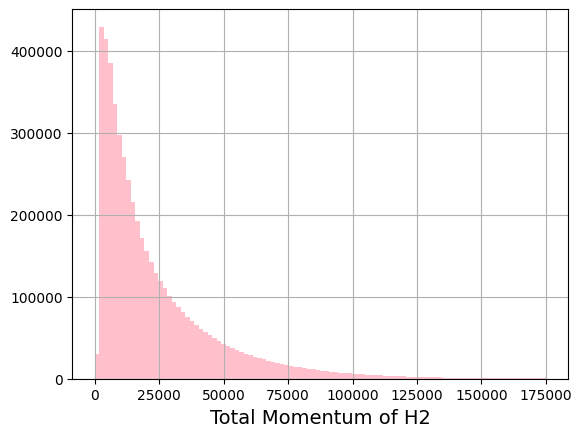

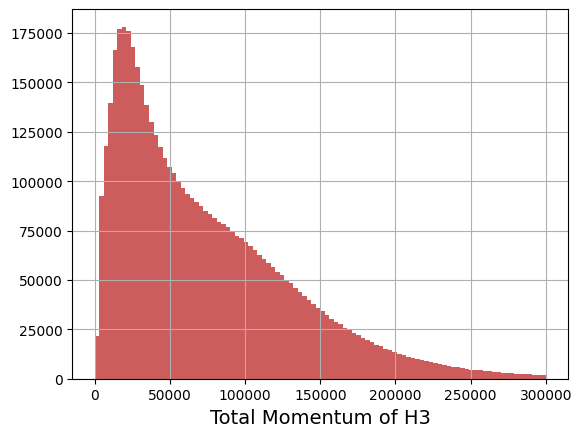

In [10]:
#Here make a plot of the Total momentum of each of the three daughters
#First is to access the data from the Decay tree and either load one array per variable or a large array with each variable as another column
Events = f['DecayTree']
H1_PX = Events['H1_PX'].array()
H1_PY = Events['H1_PY'].array()
H1_PZ = Events['H1_PZ'].array()

H2_PX = Events['H2_PX'].array()
H2_PY = Events['H2_PY'].array()
H2_PZ = Events['H2_PZ'].array()

H3_PX = Events['H3_PX'].array()
H3_PY = Events['H3_PY'].array()
H3_PZ = Events['H3_PZ'].array()

# once the data is extracted you will need to do some mathematics to calculate total momentum from the three components
# Total momentum = srqrt(x^2 + y^2 + z^2)
H1_Ptot = np.sqrt((H1_PX)**2 + (H1_PY)**2 + (H1_PZ)**2)
H2_Ptot = np.sqrt((H2_PX)**2 + (H2_PY)**2 + (H2_PZ)**2)
H3_Ptot = np.sqrt((H3_PX)**2 + (H3_PY)**2 + (H3_PZ)**2)

# plotting the total momenta for each daughter each with an adjusted range
plt.figure();
plt.grid(True)
plt.hist (H1_Ptot, bins = 100, range = (0,300000), color = 'lightcoral');
plt.xlabel('Total Momentum of H1', fontsize=14);

plt.figure();
plt.grid(True)
plt.hist (H2_Ptot, bins = 100, range = (0,175000), color = 'pink');
plt.xlabel('Total Momentum of H2', fontsize=14);

plt.figure();
plt.grid(True)
plt.hist (H3_Ptot, bins = 100, range = (0,300000), color = 'indianred');
plt.xlabel('Total Momentum of H3', fontsize=14);

In the end we do not really care about the kinetics of the daughters, our main interest is in the B-Meson. So we make the assumption that these three particles come from the same Mother, we can calculate what momentum she must have had (since momentum is conserved). So we now want to calculate and then plot the total momentum for the mother (M_Ptot).

In [11]:
#Next we need to repeat these things in order to plot the momentum of the mother
#Again, think about how we calculate the momentum of a mother particle in this case...

# Calculating the x, y and z components of the mother which is just adding up the compoenents of teh daughters added up
B_PX = H1_PX + H2_PX + H3_PX
B_PY = H1_PY + H2_PY + H3_PY
B_PZ = H1_PZ + H2_PZ + H3_PZ

# Total momentum of the mother
B_Ptot = np.sqrt((B_PX)**2 + (B_PY)**2 + (B_PZ)**2)

So we are cracking along with looking at the kinematics of our decay. What might also be handy is a way to dump our all our data from a given entry in one output:

Let's take a look at the whole data file that is available to us by looking at one specific entry - number 45

In [12]:
# lets load the data in a slightly different way:
# Lets take our decay tree and just make it an array with a header which is the name of the variable
branches = Events.arrays()

# figure out how to convert to the python 'list' format and use it there
branches_dictionary = branches.tolist()

# now we just make some pretty printing and loop over all items in the dictionary relating to one particular entry (e.g. number 45)
print ("Event number #45")
print ("-------------------")
for branch, value in branches_dictionary[45].items():
    print (branch, ":", value, sep = "\t")

Event number #45
-------------------
B_FlightDistance	:	257.00205776946603
B_VertexChi2	:	1.865567179221614
H1_PX	:	420.3413896413646
H1_PY	:	-110.66276079201207
H1_PZ	:	5883.766388082404
H1_ProbK	:	0.012183159589767456
H1_ProbPi	:	0.8191394209861755
H1_Charge	:	-1
H1_IPChi2	:	27121.53690741779
H1_isMuon	:	1
H2_PX	:	-985.6367588987478
H2_PY	:	630.9893539299605
H2_PZ	:	35342.13861801284
H2_ProbK	:	0.6670113801956177
H2_ProbPi	:	0.04563945531845093
H2_Charge	:	1
H2_IPChi2	:	13712.438218214942
H2_isMuon	:	0
H3_PX	:	-6242.300384410311
H3_PY	:	-862.2130979651508
H3_PZ	:	277275.49225626234
H3_ProbK	:	0.07501816749572754
H3_ProbPi	:	0.428352952003479
H3_Charge	:	1
H3_IPChi2	:	1026.12298434195
H3_isMuon	:	0


Our next task is to the find the Energy of each of the Kaons. We need to do this in a relativistically correct manner - so recalling that E<sup>2</sup>=p<sup>2</sup>+m<sup>2</sup> and by looking up the mass of the Kaon - you can find the Energy for the three Kaons.

In [13]:
# mass of  a Kaon
m_Kaon = 493.677 # in Mev/c

# Function of energy (general)
def energy_H(m_Kaon, H_Ptot):
    energy = np.sqrt(H_Ptot**2 + m_Kaon**2)
    return energy

# energy of daughter 1
energy1 = energy_H(m_Kaon, H1_Ptot)
print("Relativistic energy for Kaon 1 (inMev/c):", energy1)

# energy of daughter 2
energy2 = energy_H(m_Kaon, H2_Ptot)
print("Relativistic energy for Kaon 2 (inMev/c):", energy2)

# energy of daughter 3
energy3 = energy_H(m_Kaon, H3_Ptot)
print("Relativistic energy for Kaon 3 (inMev/c):", energy3)

Relativistic energy for Kaon 1 (inMev/c): [5.18e+04, 3.26e+05, 9.08e+04, 8.69e+04, ..., 3.73e+04, 3.59e+04, 5.23e+03]
Relativistic energy for Kaon 2 (inMev/c): [1.77e+04, 5.35e+03, 1.79e+04, 2.03e+04, ..., 6.37e+03, 7.76e+03, 2.21e+04]
Relativistic energy for Kaon 3 (inMev/c): [1.06e+05, 8.77e+04, 8.56e+04, 1.47e+04, ..., 1.07e+04, 1.14e+05, 1.15e+05]


We have now completed the initial steps and begun to work through what we need to with the data. This is a(nother) perfect moment to take a coffee!

Having discovered all of the relevant information about our daughter particles, we need to combine the measurements about them into a single mother - which will be our B<sup>+</sup> or our B<sup>-</sup>

Having found our momentum and energies of the particles we can use these quantities to find our experimental mass (not the theoretical mass as we have used for the reconstruction).

When we calculate this, we will get a distribution of masses. This is due to errors in the measurements made either by the detector, or in the experiment itself. We hope to have a reasonably narrow peak to work with, but, sometimes this is not possible.

Additionally there will be other particles in the detector - which means our daughters might have come from two or even three different processes. Events which don't come from the same process will give a higher or lower mass than we are looking for. This is typically called the *background* while events which come from our event of interest are called the *signal*

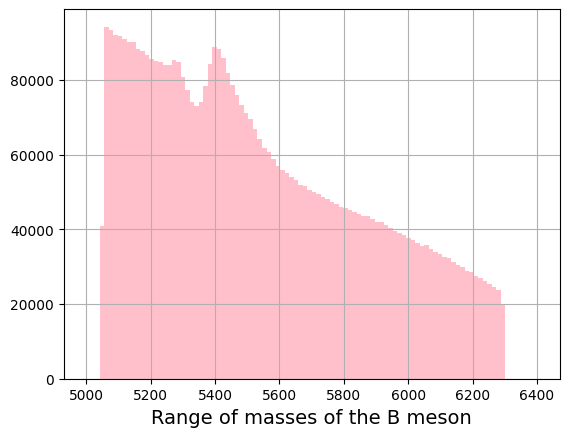

In [14]:
#Energy and momentum is conserved so we can find the quantities for B from her daughters
B_energy = energy1 + energy2 + energy3

# Experimental mass of the mother from its energy and momentum
B_exp_mass = np.sqrt(B_energy**2 - B_Ptot**2)

# Histogram of the range of masses of the B meson.
plt.figure();
plt.grid(True)
plt.hist (B_exp_mass, bins = 100, range = (5000, 6400), color = 'pink');
plt.xlabel('Range of masses of the B meson', fontsize = 14);

# The peak appears to be close to 5500 MeV/c which is relatively close to the actual value of 5200 MeV/c.

We know that some of our particles are the B<sup>+</sup> and some are the B<sup>-</sup> particle. There will also be some particles in our system that are not coming from a genuine B<sup>+/-</sup> or are a B<sup>+/-</sup> but are not constructed from Kaons.

We have some tools available to help:-

  *  During detection, software attributes the probability of a particle being a Kaon or a Pion (in the H1_ProbK or H1_ProbPi variable)
  * The detector also knows *pretty well* if the particle was a Muon - since it has detectors specifically for these. So it can attribute a 0 or a 1 to this probability
  * The reconstructed vertex has a some kind of quality associated with it (we call this the Vertex χ2 (this is the variable B_VertexChi2). This is the statistical measure that determines how well we found a single point to be the source of all three particles.



In order to get a better result, we should select our data to have the properties we desire and make some rules (often called a selection) to cut away data we don't want to include for various reasons. e.g. we know we don't have any muons in our decay - so any time H1/H2/H3 are a muon they should be excluded. The other variables are not so clear - so we can plot them to make a decision.

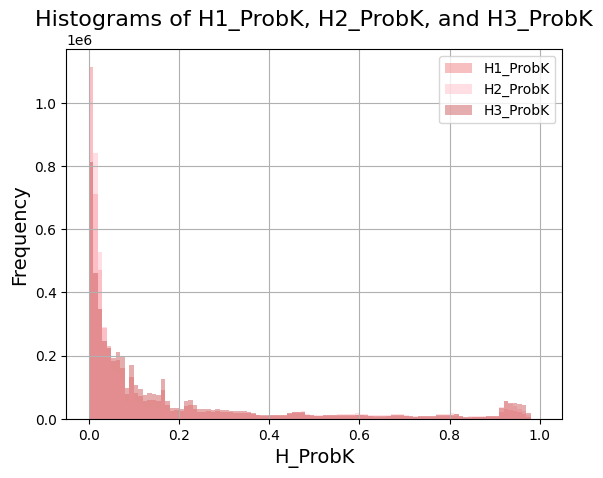

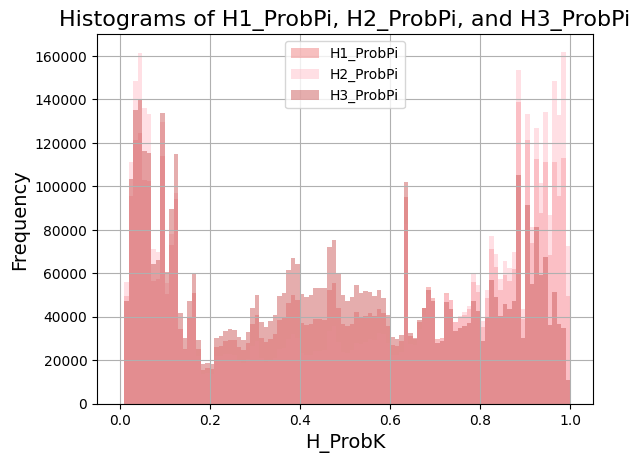

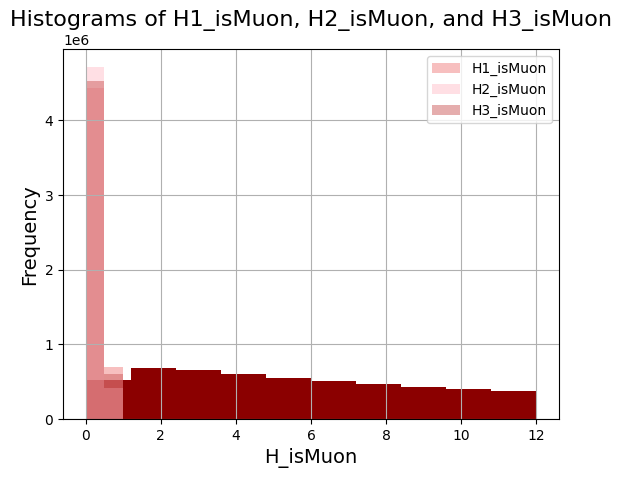

In [15]:
#Make plots of H1/H2/H3 _ProbK on one plot

H1_ProbK = branches['H1_ProbK']
H2_ProbK = branches['H2_ProbK']
H3_ProbK = branches['H3_ProbK']

# # BAR GRAPH
# means = [np.mean(H1_ProbK), np.mean(H2_ProbK), np.mean(H3_ProbK)]
# labels = ['H1_ProbK', 'H2_ProbK', 'H3_ProbK']
# x = np.arange(len(labels))
# plt.bar(x, means, color=['lightcoral', 'pink', 'indianred'], alpha=0.7)
# plt.xlabel('H_ProbK Variables', fontsize=14)
# plt.ylabel('Mean Value', fontsize=14)
# plt.title('Mean Values of H1_ProbK, H2_ProbK, and H3_ProbK', fontsize=16)
# plt.xticks(x, labels)
# plt.tight_layout()  # Adjust layout to make room for x-axis labels
# plt.show()

# HISTOGRAM
plt.hist(H1_ProbK, bins=100, range=(0, 1), color='lightcoral', alpha=0.5, label='H1_ProbK')
plt.hist(H2_ProbK, bins=100, range=(0, 1), color='pink', alpha=0.5, label='H2_ProbK')
plt.hist(H3_ProbK, bins=100, range=(0, 1), color='indianred', alpha=0.5, label='H3_ProbK')
plt.xlabel('H_ProbK', fontsize=14)
plt.grid(True)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histograms of H1_ProbK, H2_ProbK, and H3_ProbK', fontsize=16)
plt.legend()
plt.show()

#################################################################################################################

#Make plots of H1/H2/H3 _ProbPi on one plot
H1_ProbPi = branches['H1_ProbPi']
H2_ProbPi = branches['H2_ProbPi']
H3_ProbPi = branches['H3_ProbPi']

# # BAR GRAPH
# means = [np.mean(H1_ProbPi), np.mean(H2_ProbPi), np.mean(H3_ProbPi)]
# labels = ['H1_ProbPi', 'H2_ProbPi', 'H3_Probpi']
# x = np.arange(len(labels))
# plt.bar(x, means, color=['lightcoral', 'pink', 'indianred'], alpha=0.7)
# plt.xlabel('H_ProbPi Variables', fontsize=14)
# plt.ylabel('Mean Value', fontsize=14)
# plt.title('Mean Values of H1_ProbPi, H2_ProbPi, and H3_ProbPi', fontsize=16)
# plt.xticks(x, labels)
# plt.tight_layout()  # Adjust layout to make room for x-axis labels
# plt.show()

# HISTOGRAM
plt.hist(H1_ProbPi, bins=100, range=(0, 1), color='lightcoral', alpha=0.5, label='H1_ProbPi')
plt.hist(H2_ProbPi, bins=100, range=(0, 1), color='pink', alpha=0.5, label='H2_ProbPi')
plt.hist(H3_ProbPi, bins=100, range=(0, 1), color='indianred', alpha=0.5, label='H3_ProbPi')
plt.xlabel('H_ProbK', fontsize=14)
plt.grid(True)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histograms of H1_ProbPi, H2_ProbPi, and H3_ProbPi', fontsize=16)
plt.legend()
plt.show()

#################################################################################################################

#For all our particles, make a plot of the B_VertexChi2
B_VertexChi2 = branches['B_VertexChi2']

plt.figure();
plt.grid(True)
plt.hist (B_VertexChi2, color = 'darkred');
plt.xlabel('B vertex Chi**2', fontsize=14);

#################################################################################################################

# Plot any other variables from the list above you think would be handy to use in a selection...
# I chose the probabibility that teh particle is a Muon
H1_isMuon = branches['H1_isMuon']
H2_isMuon = branches['H2_isMuon']
H3_isMuon = branches['H3_isMuon']

# # BAR GRAPH
# means = [np.mean(H1_isMuon), np.mean(H2_isMuon), np.mean(H3_isMuon)]
# labels = ['H1_isMuon', 'H2_isMuon', 'H3_isMuon']
# x = np.arange(len(labels))
# plt.bar(x, means, color=['lightcoral', 'pink', 'indianred'], alpha=0.7)
# plt.xlabel('H_isMuon Variables', fontsize=14)
# plt.ylabel('Mean Value', fontsize=14)
# plt.title('Mean Values of H1_isMuon, H2_isMuon, and H3_isMuon', fontsize=16)
# plt.xticks(x, labels)
# plt.tight_layout()  # Adjust layout to make room for x-axis labels
# plt.show()

# HISTOGRAM
plt.hist(H1_isMuon, bins=2, range=(0, 1), color='lightcoral', alpha=0.5, label='H1_isMuon')
plt.hist(H2_isMuon, bins=2, range=(0, 1), color='pink', alpha=0.5, label='H2_isMuon')
plt.hist(H3_isMuon, bins=2, range=(0, 1), color='indianred', alpha=0.5, label='H3_isMuon')
plt.xlabel('H_isMuon', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.title('Histograms of H1_isMuon, H2_isMuon, and H3_isMuon', fontsize=16)
plt.legend()
plt.show()

Using these plots, we can now think about making a preselection. This has some format like the below:

In [16]:
#This example is for each daughter particle to have a Probability of being a Pion being more than 90% and H1 to not be a muon, H2 to not be an electron and H3 to be an elephant.
#This is not a good choice of selection - you should make your own :)
#selection=(branches['H1_ProbPi']>0.9) && (branches['H2_ProbPi']>0.9) && (branches['H3_ProbPi']>0.9) && (branches['H1_isMuon']!==1 && (branches['H2_isElectron'] == 1 && (branches['H3_isElephant']==1)

# not that the parameters were orginally much nore severe but I only had like 5000 events so I had to loosen them a bit                                                                 
H1_selection = np.all(((branches['H1_ProbK'] > 0.2), (branches['H1_isMuon'] == 0), (branches['H1_ProbPi'] < 0.8)), axis = 0)
H2_selection = np.all(((branches['H2_ProbK'] > 0.2), (branches['H2_isMuon'] == 0), (branches['H2_ProbPi'] < 0.8)), axis = 0)
H3_selection = np.all(((branches['H3_ProbK'] > 0.2), (branches['H3_isMuon'] == 0), (branches['H3_ProbPi'] < 0.8)), axis = 0)

selection = np.all(((branches['B_VertexChi2'] < 4, H1_selection, H2_selection, H3_selection)), axis = 0)

Number of events: 26809
We can notice that the distribution after selection is much smaller because the number of events was significatnly reduced.


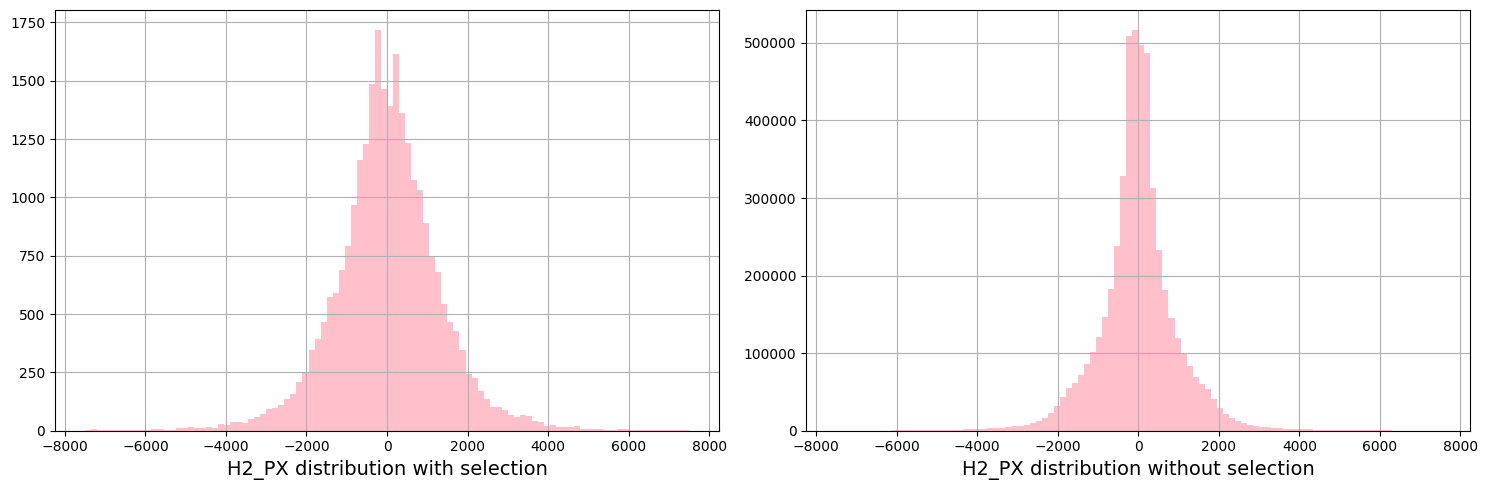

In [17]:
#To apply the selection - we can use the selection command after our instruction e.g.:
#probably we can make this more generic - try below if you like...
#So now we take our data in tree and apply selection to it (so only events which comply with those rules are kept) and put the new data in CutTree

CutTree = branches[selection]
print('Number of events:', len(CutTree)) 

CutTreeH2_PX = branches['H2_PX'][selection] # H2_PX distribution WITH selection
CutTreeH2_PX_noselec = branches['H2_PX'] # # H2_PX distribution WITHOUT selection

plt.subplots(1, 2, figsize = (15, 5));
plt.subplot(1, 2, 1);
plt.grid(True)
plt.hist (CutTreeH2_PX, bins = 100, range = (-7500, 7500), color = 'pink');
plt.xlabel('H2_PX distribution with selection', fontsize=14);
plt.subplot(1, 2, 2);
plt.grid(True)
plt.hist (CutTreeH2_PX_noselec, bins = 100, range= (-7500, 7500), color = 'pink');
plt.xlabel('H2_PX distribution without selection', fontsize=14);
plt.tight_layout()

print('We can notice that the distribution after selection is much smaller because the number of events was significatnly reduced.')


B meson mass with selection: [5.11e+03, 6.22e+03, 6.22e+03, 5.5e+03, ..., 5.09e+03, 6.18e+03, 6.13e+03]
B meson mass without selection: [5.06e+03, 5.42e+03, 5.27e+03, 5.39e+03, ..., 5.12e+03, 5.09e+03, 5.34e+03]


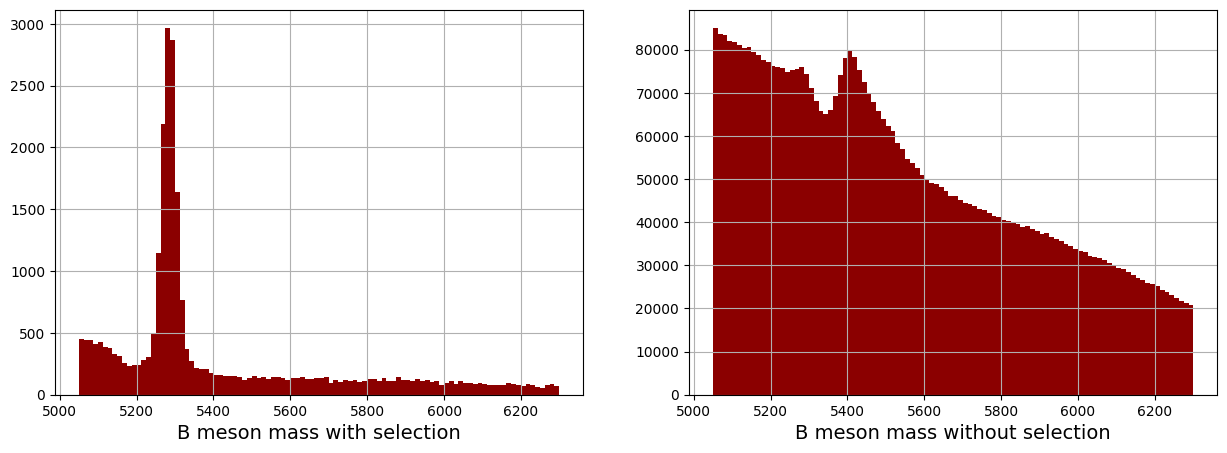

In [18]:
#Now as a good check, we should see the effect of applying our cuts.
#On one histogram, plot the B meson mass, from both the pre-cuts and the CutTree (post-cuts)
#What do you notice about your histogram now?
#You can also use len() to find the number of entries in each.

CutTree_B_mass = B_exp_mass[selection]
print("B meson mass with selection:", CutTree_B_mass)
print("B meson mass without selection:", B_exp_mass)

# Plot
plt.subplots(1, 2, figsize = (15, 5));
plt.subplot(1, 2, 1);
plt.grid(True)
plt.hist (CutTree_B_mass, bins = 100, color = 'darkred');
plt.xlabel('B meson mass with selection', fontsize=14);
plt.subplot(1, 2, 2);
plt.grid(True)
plt.hist (B_exp_mass, bins = 100, color = 'darkred');
plt.xlabel('B meson mass without selection', fontsize=14);

# How do we count the number of events?

We now have a histogram of events that we have reconstructed as a B meson. But some of these events are caused by a co-incidence of events which would still occur if there were no B mesons actually produced. We call this the background. Background and signal are indistinguishable now as the detector cannot tell the difference and our cuts were unable to remove the events for physics reasons. We can do some statistical analysis, if we know the approximate shapes of our signal and our background. Just like a least-squares fitting we can run a fit routine to minimise the error between the fitted curve and our data. As an example, if we know our data has an exponential background and a gaussian signal:

![Gaussian+Exp Background](https://twiki.cern.ch/twiki/pub/RooStats/RooStatsTutorialsJune2013/GausExpModelFit.png)

Here the red line represents our signal, the blue dotted line is our background and the solid blue line is our combined curve. The graph also shows the number of signal events and the number of background events. The signal now is a tiny fraction of the total data shown in the plot.

In order to do this, we need to build a fit model, around which the software can try to fit our data.

We use RooFit for this, which includes:
* Gaussian
* Exponential
* Chebychev
* Crystal Ball
* Breit-Wigner

As well as several other choices.

Typically exponential and Chebychev functions are used for background and Gaussian, Crystal Ball and Breit-Wigner are used for signal. We can also combine them (e.g. 1 crystal ball, 1 gaussian, 1 exponential) in various ways.

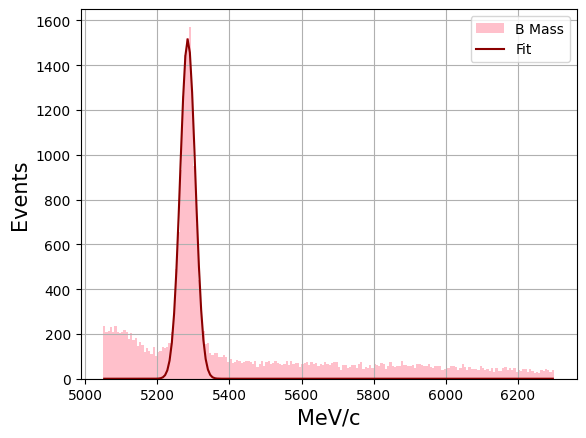

In [19]:
# Grab another package
from scipy.optimize import curve_fit

# Start by defining the variable we are interested in: the cut out mass
B_Mass = CutTree_B_mass

# we make a plot (plt.hist) and then we extract the bin height and it's edges from the plot...
bin_height, bin_edge, _ = plt.hist(B_Mass, bins = 200, label = "B Mass", color = 'pink')

# Now we need to turn this into the x and y data for our fit. *Be careful* - you don't want the edges of the histogram bins directly - but something related
x_data = (bin_edge[:-1] + bin_edge[1:]) / 2 # center of bin 
y_data = bin_height

# Gauss function for fitting
def gauss (x, *p):
    A, mu, sigma = p
    return A * np.exp(- (x - mu)**2 / (2. * sigma**2))

# Fitted curve 
optimisedParameters, pcov = curve_fit(gauss, x_data, y_data, p0 = [5300, 600, max(y_data)])
yfit = gauss(x_data, *optimisedParameters)

# NOverlaying in the plotting environment 
plt.plot(x_data, yfit, label = 'Fit', color = 'darkred')
plt.xlabel("MeV/c", fontsize = 15)
plt.ylabel("Events", fontsize = 15)
plt.legend()
plt.grid(True)
plt.legend()
plt.show()

[1515.97430739 5284.66644126   20.80507848]


/var/folders/hb/vq2gzxy94vd_zkmg0t97mjnw0000gn/T/ipykernel_48216/2552989393.py:14: RuntimeWarning: overflow encountered in exp
  return D * np.exp(x * c)


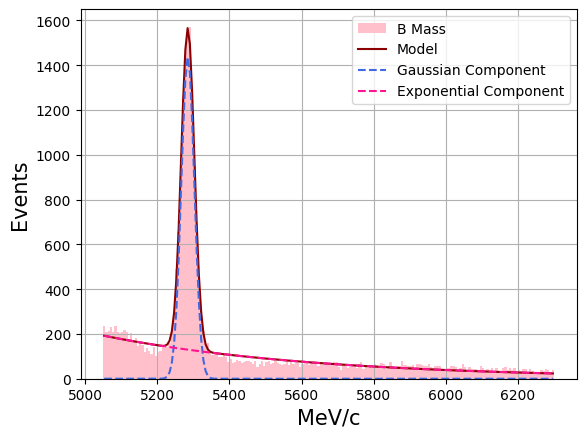

Fitted parameters for the combined parameters:


NameError: name 'uncert_A' is not defined

In [20]:
# Explore optimisedParameters - what does it contain? 
print(optimisedParameters)
A, mu, sigma = optimisedParameters[:3]
# Look at the documentation for Scipy Curve_Fit and try to add another curve - we need a background 
# which has an exponential shape - and we want to make a combined model to fit which contains both the gauss and the exponential...

def gauss (x, *p):
    A, mu, sigma = p
    return A * np.exp(- (x - mu)**2 / (2. * sigma**2))

# create a really simple exponential function
def exponential(x, *p):
    D, c = p
    return D * np.exp(x * c)

# create my model that is a combination of gaussian and exponential functions
def model(x, *p):
    A, mu, sigma, D, c  = p
    return gauss (x, A, mu, sigma) + exponential(x, D, c)

# modified these so they work for my new combined model
optimisedParametersmodel, pcov = curve_fit(model, x_data, y_data, p0 = [5300, 600, max(y_data), max(y_data)/10, -0.001])
yfit_model = model(x_data, *optimisedParametersmodel)

# yfit for each component
yfit_gauss = gauss(x_data, *optimisedParametersmodel[:3])  # First 3 parameters 
yfit_expo = exponential(x_data, *optimisedParametersmodel[3:])  # Last 2 parameters
yfit_model = model(x_data, *optimisedParametersmodel)  # Total fit

# Plot histogram of data
plt.hist(B_Mass, bins = 200, label = "B Mass", color = 'pink')
plt.plot(x_data, yfit_model, label = 'Model', color = 'darkred')
plt.plot(x_data, yfit_gauss, label = 'Gaussian Component', linestyle = 'dashed', color = 'royalblue')
plt.plot(x_data, yfit_expo, label = 'Exponential Component', linestyle = 'dashed', color = 'deeppink')
plt.xlabel("MeV/c", fontsize=15)
plt.ylabel("Events", fontsize=15)
plt.grid(True)
plt.legend()
plt.show()

print("Fitted parameters for the combined parameters:")
print(f"A (amplitude) = {A:.2f} ± {uncert_A:.2f}")
print(f"μ (mean) = {mu:.2f} ± {uncert_mu:.2f}")
print(f"σ (standard deviation) = {sigma:.2f} ± {uncert_sigma:.2f}")


Using this structure, you can in theory build whatever models you like!

Some recommendations (but not necessary to do ):-



*   Gauss+Exponential (as above)
*   Crystal Ball + Exponential
*   Gauss+Crystal Ball+Exponential (now you need to weigh the two signal peaks and then the total signal against total background)
*   Gauss+Chebychev
*   Two Crystal Balls + Exponential

So how good was the fit, and how many events do you have?

Look into the documentation for Curve_Fit from SciPy - and find the number of events and the error on them.

Neither of these measures would tell us if this was a good fit or not. Normally we use a χ2 test to do so - this is built into the image we made (so we can do frame.chiSquare() to get this data)

For each model you made, print the signal and background yields (with errors) and report the χ2

In [97]:
from math import pi

# formula was given in class I just plugged in my own numbers (can be foudn above)
nb_events = (A * sigma * np.sqrt(2 * pi) * 200) / (6250 - 5050)
print('Number of events (yield):', nb_events)

# uncertainties of A, mu and sigma
uncert_A, uncert_mu, uncert_sigma = np.sqrt(np.diag(pcov[:3]))
print('Uncertainty of A:', uncert_A, '\n' 'Uncertainty of sigma:', uncert_sigma)

# error of the whole
err_yield = np.sqrt(((uncert_A/A)**2) + ((uncert_sigma/sigma)**2)) * nb_events
print('Error:', err_yield)

Number of events (yield): 13176.494441321644
Uncertainty of A: 10.740176089663498 
Uncertainty of sigma: 0.15910609324547023
Error: 137.36218522396146


# Counting 

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge``` etc.). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [98]:
# Function of the momenta of the daughters
def H_Ptot(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ):
    H1_Ptot = np.sqrt(H1_PX**2 + H1_PY**2 + H1_PZ**2)
    H2_Ptot = np.sqrt(H2_PX**2 + H2_PY**2 + H2_PZ**2)
    H3_Ptot = np.sqrt(H3_PX**2 + H3_PY**2 + H3_PZ**2)
    return H1_Ptot, H2_Ptot, H3_Ptot

# Function for the mother's momentum
def Calc_B_Ptot(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ):
    X_Ptot = (H1_PX + H2_PX + H3_PX)**2
    Y_Ptot = (H1_PY + H2_PY + H3_PY)**2
    Z_Ptot = (H1_PZ + H2_PZ + H3_PZ)**2
    B_Ptot = np.sqrt(X_Ptot + Y_Ptot + Z_Ptot)
    return B_Ptot

# Function for the mother's energy
def B_E_tot(H1_Ptot, H2_Ptot, H3_Ptot, m_Kaon):
    H1_E = np.sqrt(H1_Ptot**2 + m_Kaon**2)
    H2_E = np.sqrt(H2_Ptot**2 + m_Kaon**2)
    H3_E = np.sqrt(H3_Ptot**2 + m_Kaon**2)
    E_Tot = H1_E + H2_E + H3_E
    return H1_E, H2_E, H3_E, E_Tot

# Mass of the moter
def Mass_B(E_Tot, B_Ptot):
    M_B = np.sqrt(E_Tot**2 - B_Ptot**2)
    return M_B


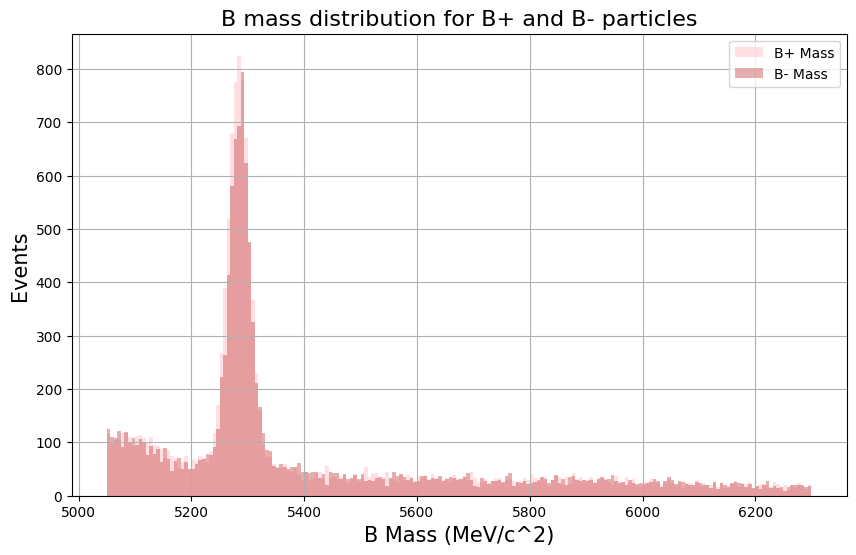

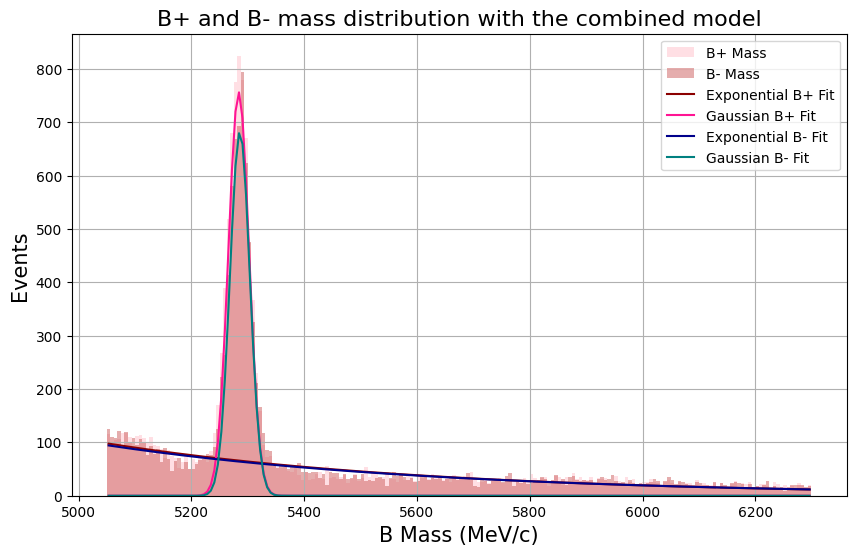

Fitted parameters for B+:
A (amplitude) = 756.54 ± 5.62
μ (mean) = 5283.86 ± 0.16
σ (standard deviation) = 18.40 ± 0.16
B (exponential amplitude) = 543847.91 ± 179944.95
C (exponential decay) = -1.707e-03 ± 6.198e-05

Fitted parameters for B-:
A (amplitude) = 682.67 ± 6.99
μ (mean) = 5285.94 ± 0.21
σ (standard deviation) = 17.63 ± 0.21
B (exponential amplitude) = 438842.28 ± 179445.25
C (exponential decay) = -1.671e-03 ± 7.654e-05


In [101]:
def calculate_M_B(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ):
    # Calculate total momentum for each particle
    H1_Ptot, H2_Ptot, H3_Ptot = H_Ptot(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ)
    
    # Calculate total momentum for the B particle
    B_Ptot = Calc_B_Ptot(H1_PX, H2_PX, H3_PX, H1_PY, H2_PY, H3_PY, H1_PZ, H2_PZ, H3_PZ)
    
    # Calculate energies and total energy
    H1_E, H2_E, H3_E, E_Tot = B_E_tot(H1_Ptot, H2_Ptot, H3_Ptot, m_Kaon)
    
    # Calculate the mass of the B particle
    M_B = Mass_B(E_Tot, B_Ptot)
    return M_B

def get_cut_data(selection):
    # Apply selection criteria to extract relevant data for each particle
    H1_PX_Cut = branches['H1_PX'][selection]
    H2_PX_Cut = branches['H2_PX'][selection]
    H3_PX_Cut = branches['H3_PX'][selection]
    H1_PY_Cut = branches['H1_PY'][selection]
    H2_PY_Cut = branches['H2_PY'][selection]
    H3_PY_Cut = branches['H3_PY'][selection]
    H1_PZ_Cut = branches['H1_PZ'][selection]
    H2_PZ_Cut = branches['H2_PZ'][selection]
    H3_PZ_Cut = branches['H3_PZ'][selection]
    return H1_PX_Cut, H2_PX_Cut, H3_PX_Cut, H1_PY_Cut, H2_PY_Cut, H3_PY_Cut, H1_PZ_Cut, H2_PZ_Cut, H3_PZ_Cut

# Extract charge information for each daughter
H1_Charge = Events['H1_Charge'].array()
H2_Charge = Events['H2_Charge'].array()
H3_Charge = Events['H3_Charge'].array()

# Define selection criteria for B+ and B- particles based on charge
charge_selection_B_Plus = (H1_Charge + H2_Charge + H3_Charge == 1) & selection
charge_selection_B_Min = (H1_Charge + H2_Charge + H3_Charge == -1) & selection

# Get cut data for B+ and B- selections
H1_PX_Cut_Plus, H2_PX_Cut_Plus, H3_PX_Cut_Plus, H1_PY_Cut_Plus, H2_PY_Cut_Plus, H3_PY_Cut_Plus, H1_PZ_Cut_Plus, H2_PZ_Cut_Plus, H3_PZ_Cut_Plus = get_cut_data(charge_selection_B_Plus)
H1_PX_Cut_Min, H2_PX_Cut_Min, H3_PX_Cut_Min, H1_PY_Cut_Min, H2_PY_Cut_Min, H3_PY_Cut_Min, H1_PZ_Cut_Min, H2_PZ_Cut_Min, H3_PZ_Cut_Min = get_cut_data(charge_selection_B_Min)

# Calculate B mass for both charge selections
M_B_Plus = calculate_M_B(H1_PX_Cut_Plus, H2_PX_Cut_Plus, H3_PX_Cut_Plus, H1_PY_Cut_Plus, H2_PY_Cut_Plus, H3_PY_Cut_Plus, H1_PZ_Cut_Plus, H2_PZ_Cut_Plus, H3_PZ_Cut_Plus)
M_B_Min = calculate_M_B(H1_PX_Cut_Min, H2_PX_Cut_Min, H3_PX_Cut_Min, H1_PY_Cut_Min, H2_PY_Cut_Min, H3_PY_Cut_Min, H1_PZ_Cut_Min, H2_PZ_Cut_Min, H3_PZ_Cut_Min)

# Create a histogram
plt.figure(figsize = (10, 6))
plt.grid(True)
bin_height_Plus, bin_edge_Plus, _ = plt.hist(M_B_Plus, bins = 200, range = (min(M_B_Plus), max(M_B_Plus)), label = "B+ Mass", alpha = 0.5, color = 'pink')
bin_height_Min, bin_edge_Min, _ = plt.hist(M_B_Min, bins = 200, range = (min(M_B_Min), max(M_B_Min)), label = "B- Mass", alpha = 0.5, color = 'indianred')  
plt.xlabel("B Mass (MeV/c^2)", fontsize = 15)
plt.ylabel("Events", fontsize = 15)
plt.title("B mass distribution for B+ and B- particles", fontsize = 16)
plt.legend()
plt.show()

# Calculate the x and y data for fitting
# x_data is the midpoint of each histogram bin
x_data_Plus = 0.5 * (bin_edge_Plus[1:] + bin_edge_Plus[:-1])
x_data_Min = 0.5 * (bin_edge_Min[1:] + bin_edge_Min[:-1])  
# y_data is the height of the histogram bins
y_data_Plus = bin_height_Plus  
y_data_Min = bin_height_Min  

def get_paramaters(initialParametersCombined, x_data, y_data):
    # Fit the model to the data and return optimized parameters and covariance
    optimisedParametersCombined, pcov = curve_fit(model, x_data, y_data, p0=initialParametersCombined)
    return optimisedParametersCombined, pcov

# Initial parameters for fitting B+ and B- data
initialParameters_B_Plus = [max(y_data_Plus), np.mean(M_B_Plus), np.std(M_B_Plus), max(y_data_Plus) * 0.2, 0.00001]
initialParameters_B_Min = [max(y_data_Min), np.mean(M_B_Min), np.std(M_B_Min), max(y_data_Min) * 0.2, 0.00001]

# Optimize parameters for B+ and B- fits
optimisedParameters_B_Plus, pcov_B_Plus = get_paramaters(initialParameters_B_Plus, x_data_Plus, y_data_Plus)
optimisedParameters_B_Min, pcov_B_Min = get_paramaters(initialParameters_B_Min, x_data_Min, y_data_Min)

# Extract fitted parameters and their uncertainties for B+ and B-
A_Plus, mu_Plus, sigma_Plus, B_Plus, C_Plus = optimisedParameters_B_Plus
A_Plus_Uncertainty, mu_Plus_Uncertainty, sigma_Plus_Uncertainty, B_Plus_Uncertainty, C_Plus_Uncertainty = np.sqrt(np.diag(pcov_B_Plus))
A_Min, mu_Min, sigma_Min, B_Min, C_Min = optimisedParameters_B_Min
A_Min_Uncertainty, mu_Min_Uncertainty, sigma_Min_Uncertainty, B_Min_Uncertainty, C_Min_Uncertainty = np.sqrt(np.diag(pcov_B_Min))

# Calculate fitted values for B+ and B- using the optimized parameters
y_fit_exp_B_Plus = exponential(x_data_Plus, B_Plus, C_Plus)
y_fit_gauss_B_Plus = gauss(x_data_Plus, A_Plus, mu_Plus, sigma_Plus)
y_fit_exp_B_Min = exponential(x_data_Min, B_Min, C_Min)
y_fit_gauss_B_Min = gauss(x_data_Min, A_Min, mu_Min, sigma_Min)

# Create a figure for the final histogram and fits
plt.figure(figsize = (10, 6))
plt.grid(True)
plt.hist(M_B_Plus, bins = 200, range = (min(M_B_Plus), max(M_B_Plus)), label = "B+ Mass", alpha = 0.5, color = 'pink')
plt.hist(M_B_Min, bins = 200, range = (min(M_B_Min), max(M_B_Min)), label = "B- Mass", alpha = 0.5, color = 'indianred') 
plt.plot(x_data_Plus, y_fit_exp_B_Plus, label = 'Exponential B+ Fit', color = 'darkred')
plt.plot(x_data_Plus, y_fit_gauss_B_Plus, label = 'Gaussian B+ Fit', color = 'deeppink')
plt.plot(x_data_Min, y_fit_exp_B_Min, label = 'Exponential B- Fit', color = 'darkblue')
plt.plot(x_data_Min, y_fit_gauss_B_Min, label = 'Gaussian B- Fit', color = 'teal')
plt.xlabel("B Mass (MeV/c)", fontsize = 15)
plt.ylabel("Events", fontsize = 15)
plt.title("B+ and B- mass distribution with the combined model", fontsize = 16)
plt.legend()
plt.show()

# Print fitted parameters for B+ and B-
print("Fitted parameters for B+:")
print(f"A (amplitude) = {A_Plus:.2f} ± {A_Plus_Uncertainty:.2f}")
print(f"μ (mean) = {mu_Plus:.2f} ± {mu_Plus_Uncertainty:.2f}")
print(f"σ (standard deviation) = {sigma_Plus:.2f} ± {sigma_Plus_Uncertainty:.2f}")
print(f"B (exponential amplitude) = {B_Plus:.2f} ± {B_Plus_Uncertainty:.2f}")
print(f"C (exponential decay) = {C_Plus:.3e} ± {C_Plus_Uncertainty:.3e}") 

print("\nFitted parameters for B-:")
print(f"A (amplitude) = {A_Min:.2f} ± {A_Min_Uncertainty:.2f}")
print(f"μ (mean) = {mu_Min:.2f} ± {mu_Min_Uncertainty:.2f}")
print(f"σ (standard deviation) = {sigma_Min:.2f} ± {sigma_Min_Uncertainty:.2f}")
print(f"B (exponential amplitude) = {B_Min:.2f} ± {B_Min_Uncertainty:.2f}")
print(f"C (exponential decay) = {C_Min:.3e} ± {C_Min_Uncertainty:.3e}") 

Now with the reversed magnet

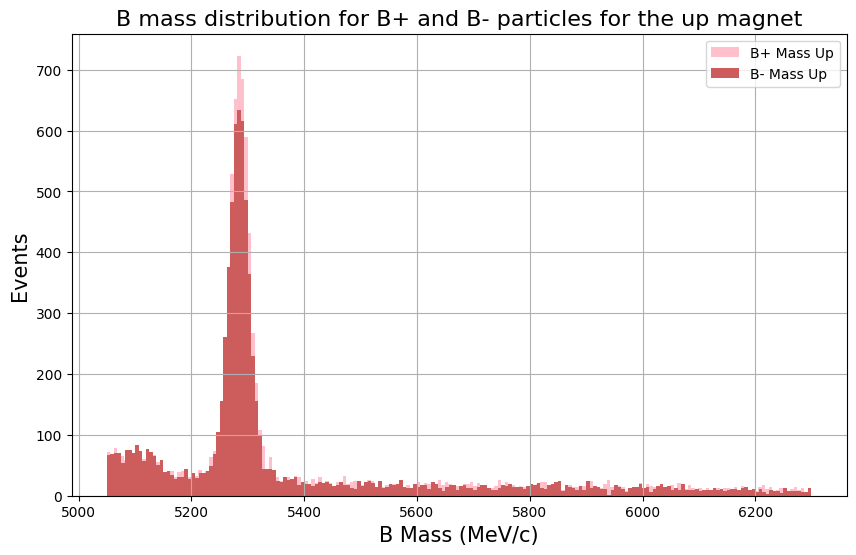

The number of B+ (up): 4583.579174943448
The number of B- (up): 4158.416083487287


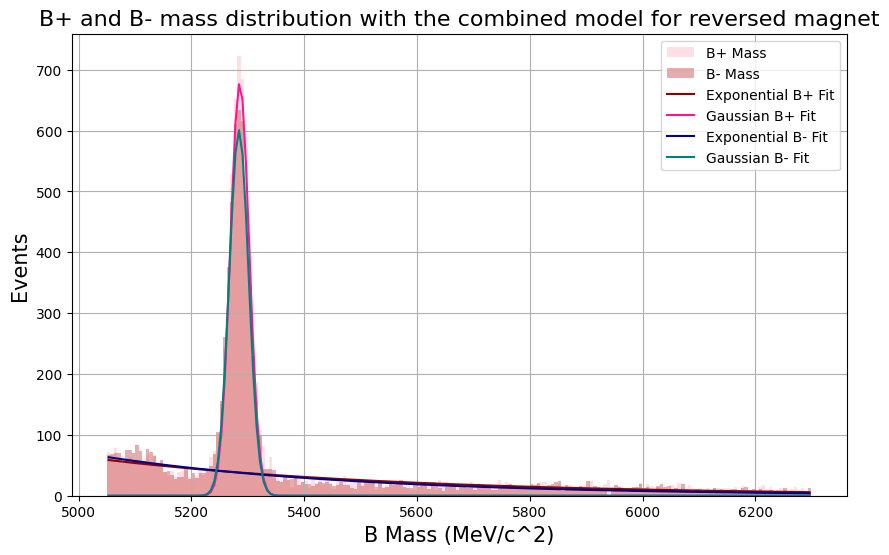

Fitted parameters for B+ up:
A (amplitude) = 678.67 ± 4.46
μ (mean) = 5285.64 ± 0.13
σ (standard deviation) = 16.74 ± 0.13
B (exponential amplitude) = 675604.93 ± 306535.26
C (exponential decay) = 1.851e-03 ± 8.536e-05

Fitted parameters for B- up:
A (amplitude) = 600.66 ± 4.44
μ (mean) = 5284.22 ± 0.15
σ (standard deviation) = 17.17 ± 0.15
B (exponential amplitude) = 4751220.37 ± 2471549.94
C (exponential decay) = 2.222e-03 ± 9.869e-05
The assymetry (reversed magnet) between B+ and B- is: -0.04863455983302392 with uncertainty: 0.010682686548305884
So the reversed magnets compared:
assymmetry: -0.04863455983302392 --- -0.04863455983302392
Uncertainty: 0.010682686548305884 --- 0.010682686548305884 


In [22]:
# Import packages
import uproot, awkward, numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

m_Kaon = 493.677

# Open the ROOT file using the open command
f_Up = uproot.open ("B2HHH_MagnetUp.root")

# From our file, we have to extract the DecayTree
f_Up.keys()

# Access the data from the Decay tree and either load one array per variable
Events_Up = f_Up['DecayTree']
branches_up = Events_Up.arrays()

H1_Charge_Up = Events_Up['H1_Charge'].array()
H2_Charge_Up = Events_Up['H2_Charge'].array()
H3_Charge_Up = Events_Up['H3_Charge'].array()

# Create a selection for this magnet
selection_Up = (
    (branches_up['H1_ProbK'] > 0.15) &  
    (branches_up['H2_ProbK'] > 0.15) &  
    (branches_up['H3_ProbK'] > 0.15) &  
    (branches_up['H1_ProbPi'] < 0.40) &  
    (branches_up['H2_ProbPi'] < 0.40) &  
    (branches_up['H3_ProbPi'] < 0.40) &  
    (branches_up['H1_isMuon'] != 1) &    
    (branches_up['H2_isMuon'] != 1) &    
    (branches_up['H3_isMuon'] != 1) &    
    (branches_up['H1_ProbK'] > branches_up['H1_ProbPi']) &  
    (branches_up['H2_ProbK'] > branches_up['H2_ProbPi']) &  
    (branches_up['H3_ProbK'] > branches_up['H3_ProbPi'])    )

# Extract the data after selection is applied to it
def get_cut_data_up(selection_up):
    H1_PX_Cut_up = branches_up['H1_PX'][selection_up]
    H2_PX_Cut_up = branches_up['H2_PX'][selection_up]
    H3_PX_Cut_up = branches_up['H3_PX'][selection_up]
    H1_PY_Cut_up = branches_up['H1_PY'][selection_up]
    H2_PY_Cut_up = branches_up['H2_PY'][selection_up]
    H3_PY_Cut_up = branches_up['H3_PY'][selection_up]
    H1_PZ_Cut_up = branches_up['H1_PZ'][selection_up]
    H2_PZ_Cut_up = branches_up['H2_PZ'][selection_up]
    H3_PZ_Cut_up = branches_up['H3_PZ'][selection_up]
    return H1_PX_Cut_up, H2_PX_Cut_up, H3_PX_Cut_up, H1_PY_Cut_up, H2_PY_Cut_up, H3_PY_Cut_up, H1_PZ_Cut_up, H2_PZ_Cut_up, H3_PZ_Cut_up

# New momentum of our daughters for this magnet
def H_Ptot_up(H1_PX_up, H2_PX_up, H3_PX_up, H1_PY_up, H2_PY_up, H3_PY_up, H1_PZ_up, H2_PZ_up, H3_PZ_up):
    H1_Ptot_up = np.sqrt(H1_PX_up**2 + H1_PY_up**2 + H1_PZ_up**2)
    H2_Ptot_up = np.sqrt(H2_PX_up**2 + H2_PY_up**2 + H2_PZ_up**2)
    H3_Ptot_up = np.sqrt(H3_PX_up**2 + H3_PY_up**2 + H3_PZ_up**2)
    return H1_Ptot_up, H2_Ptot_up, H3_Ptot_up

# Momentum of mother for this magnet
def Calc_B_Ptot_up(H1_PX_up, H2_PX_up, H3_PX_up, H1_PY_up, H2_PY_up, H3_PY_up, H1_PZ_up, H2_PZ_up, H3_PZ_up):
    X_Ptot_up = (H1_PX_up+ H2_PX_up + H3_PX_up)**2
    Y_Ptot_up = (H1_PY_up + H2_PY_up + H3_PY_up)**2
    Z_Ptot_up = (H1_PZ_up + H2_PZ_up +H3_PZ_up)**2
    B_Ptot_up = np.sqrt(X_Ptot_up + Y_Ptot_up+ Z_Ptot_up)
    return B_Ptot_up

# Energy of mother for this magnet
def B_E_tot_up(H1_Ptot_up, H2_Ptot_up, H3_Ptot_up, m_Kaon):
    H1_E_up = np.sqrt(H1_Ptot_up**2 + m_Kaon**2)
    H2_E_up = np.sqrt(H2_Ptot_up**2 + m_Kaon**2)
    H3_E_up = np.sqrt(H3_Ptot_up**2 + m_Kaon**2)
    E_Tot_up = H1_E_up + H2_E_up + H3_E_up
    return H1_E_up, H2_E_up, H3_E_up, E_Tot_up

# Mass of the mother for this magnet
def Mass_B_up(E_Tot_up, B_Ptot_up):
    M_B_up = np.sqrt(E_Tot_up**2 - B_Ptot_up**2)
    return M_B_up

def calculate_M_B_up(H1_PX_up, H2_PX_up, H3_PX_up, H1_PY_up, H2_PY_up, H3_PY_up, H1_PZ_up, H2_PZ_up, H3_PZ_up):
    H1_Ptot_up, H2_Ptot_up, H3_Ptot_up = H_Ptot_up(H1_PX_up, H2_PX_up, H3_PX_up, H1_PY_up, H2_PY_up, H3_PY_up, H1_PZ_up, H2_PZ_up, H3_PZ_up)
    B_Ptot_up= Calc_B_Ptot_up(H1_PX_up, H2_PX_up, H3_PX_up, H1_PY_up, H2_PY_up, H3_PY_up, H1_PZ_up, H2_PZ_up, H3_PZ_up)
    H1_E_up, H2_E_up, H3_E_up, E_Tot_up = B_E_tot_up(H1_Ptot_up, H2_Ptot_up, H3_Ptot_up, m_Kaon)
    M_B_up = Mass_B_up(E_Tot_up, B_Ptot_up)
    return M_B_up

def get_paramaters(initialParametersCombined, x_data, y_data):
    # Fit the model to the data and return optimized parameters and covariance
    optimisedParametersCombined, pcov = curve_fit(model, x_data, y_data, p0=initialParametersCombined)
    return optimisedParametersCombined, pcov

def gauss(x, *p):
    # Gaussian function definition
    A, mu, sigma = p
    return A * np.exp(- (x - mu)**2 / (2. * sigma**2))

def exponential(x, *p):
    # Exponential function definition
    B, C = p
    return B * np.exp(-C * x)

def model(x, A, mu, sigma, B, C):
    # Combined model of Gaussian and Exponential functions
    return gauss(x, A, mu, sigma) + exponential(x, B, C)

# Define selection criteria for B+ and B- particles based on charge for the Up magnet
charge_selection_B_Plus_Up = (H1_Charge_Up + H2_Charge_Up + H3_Charge_Up == 1) & selection_Up
charge_selection_B_Min_Up = (H1_Charge_Up + H2_Charge_Up + H3_Charge_Up == -1) & selection_Up

# Get the cut data for B+ and B- based on the defined selection criteria
H1_PX_Up_Plus, H2_PX_Up_Plus, H3_PX_Up_Plus, H1_PY_Up_Plus, H2_PY_Up_Plus, H3_PY_Up_Plus, H1_PZ_Up_Plus, H2_PZ_Up_Plus, H3_PZ_Up_Plus = get_cut_data_up(charge_selection_B_Plus_Up)
H1_PX_Up_Min, H2_PX_Up_Min, H3_PX_Up_Min, H1_PY_Up_Min, H2_PY_Up_Min, H3_PY_Up_Min, H1_PZ_Up_Min, H2_PZ_Up_Min, H3_PZ_Up_Min = get_cut_data_up(charge_selection_B_Min_Up)

# Calculate the B mass for B+ and B- using the cut data for the up magnet
M_B_Plus_Up = calculate_M_B_up(H1_PX_Up_Plus, H2_PX_Up_Plus, H3_PX_Up_Plus, H1_PY_Up_Plus, H2_PY_Up_Plus, H3_PY_Up_Plus, H1_PZ_Up_Plus, H2_PZ_Up_Plus, H3_PZ_Up_Plus)
M_B_Min_Up = calculate_M_B_up(H1_PX_Up_Min, H2_PX_Up_Min, H3_PX_Up_Min, H1_PY_Up_Min, H2_PY_Up_Min, H3_PY_Up_Min, H1_PZ_Up_Min, H2_PZ_Up_Min, H3_PZ_Up_Min)

# Create a histogram for B+ and B- mass distributions for the up magnet
plt.figure(figsize = (10, 6))
plt.grid(True)
bin_height_Plus_Up, bin_edge_Plus_Up, _ = plt.hist(M_B_Plus_Up, bins = 200, range = (min(M_B_Plus_Up), max(M_B_Plus_Up)), label = "B+ Mass Up", color = 'pink')
bin_height_Min_Up, bin_edge_Min_Up, _ = plt.hist(M_B_Min_Up, bins = 200, range = (min(M_B_Min_Up), max(M_B_Min_Up)), label = "B- Mass Up", color = 'indianred') 
plt.xlabel("B Mass (MeV/c)", fontsize = 15)
plt.ylabel("Events", fontsize = 15)
plt.title("B mass distribution for B+ and B- particles for the up magnet", fontsize = 16)
plt.legend()
plt.show()

# # Create histograms for B+ and B- mass distributions for the Up magnet
# bin_height_Plus_Up, bin_edge_Plus_Up, _ = plt.hist(M_B_Plus_Up, bins = 200, range = (min(M_B_Plus_Up), max(M_B_Plus_Up)), label = "B+ Mass Up")
# bin_height_Min_Up, bin_edge_Min_Up, _ = plt.hist(M_B_Min_Up, bins = 200, range = (min(M_B_Min_Up), max(M_B_Min_Up)), label = "B- Mass Up")

# Calculate the x and y data for fitting from the histogram edges and heights
x_data_Plus_up = 0.5 * (bin_edge_Plus_Up[1:] + bin_edge_Plus_Up[:-1])  # Midpoints for B+ histogram
x_data_Min_up = 0.5 * (bin_edge_Min_Up[1:] + bin_edge_Min_Up[:-1])  # Midpoints for B- histogram
y_data_Plus_up = bin_height_Plus_Up  # Heights for B+ histogram
y_data_Min_up = bin_height_Min_Up  # Heights for B- histogram

# Define initial parameters for fitting the B+ and B-mass distribution for the magnet
initialParameters_B_Plus_up = [max(y_data_Plus_up), np.mean(M_B_Plus_Up), np.std(M_B_Plus_Up), max(y_data_Plus_up) * 0.2, 0.00001]
initialParameters_B_Min_up = [max(y_data_Min_up), np.mean(M_B_Min_Up), np.std(M_B_Min_Up), max(y_data_Min_up) * 0.2, 0.00001]

# Optimize parameters for the B+ and B-mass fit using the defined initial parameters and the corresponding data
optimisedParameters_B_Plus_up, pcov_B_Plus_up = get_paramaters(initialParameters_B_Plus_up, x_data_Plus_up, y_data_Plus_up)
optimisedParameters_B_Min_up, pcov_B_Min_up = get_paramaters(initialParameters_B_Min_up, x_data_Min_up, y_data_Min_up)

# Extract optimized parameters for B+ and B-from the fitting results
A_Plus_up, mu_Plus_up, sigma_Plus_up, B_Plus_up, C_Plus_up = optimisedParameters_B_Plus_up
A_Min_up, mu_Min_up, sigma_Min_up, B_Min_up, C_Min_up = optimisedParameters_B_Min_up

# Calculate uncertainties for the optimized parameters of B+ and B- using the covariance matrix
A_Plus_Uncertainty_up, mu_Plus_Uncertainty_up, sigma_Plus_Uncertainty_up, B_Plus_Uncertainty_up, C_Plus_Uncertainty_up = np.sqrt(np.diag(pcov_B_Plus_up))
A_Min_Uncertainty_up, mu_Min_Uncertainty_up, sigma_Min_Uncertainty_up, B_Min_Uncertainty_up, C_Min_Uncertainty_up = np.sqrt(np.diag(pcov_B_Min_up))

# Calculate the fitted exponential curve for the B+ and B- mass distribution using optimized parameters
y_fit_exp_B_Plus_up = exponential(x_data_Plus_up, B_Plus_up, C_Plus_up)
y_fit_exp_B_Min_up = exponential(x_data_Min_up, B_Min_up, C_Min_up)

# Calculate the fitted Gaussian curve for the B+ and B- mass distribution using optimized parameters
y_fit_gauss_B_Plus_up = gauss(x_data_Plus_up, A_Plus_up, mu_Plus_up, sigma_Plus_up)
y_fit_gauss_B_Min_up = gauss(x_data_Min_up, A_Min_up, mu_Min_up, sigma_Min_up)

# Calculate the area under the Gaussian fit for the B+ and B- mass distribution
# This is done using the formula for the area of a Gaussian
area_gauss_Plus_up = (A_Plus_up * sigma_Plus_up * np.sqrt(2 * np.pi)) / (max(x_data_Plus_up) - min(x_data_Plus_up)) * 200
area_gauss_Min_up = A_Min_up * sigma_Min_up * np.sqrt(2 * np.pi) / (max(x_data_Min_up) - min(x_data_Min_up)) * 200

# Print the estimated number of B+ and B- particles based on the area under the Gaussian fit
print(f'The number of B+ (up): {area_gauss_Plus_up}')
print(f'The number of B- (up): {area_gauss_Min_up}')

# Calculate the asymmetry between the number of B- and B+ particles
assymetry_up = (area_gauss_Min_up - area_gauss_Plus_up) / (area_gauss_Min_up + area_gauss_Plus_up)

# Calculate the uncertainty in the asymmetry measurement
uncertainty_assymetry_up = np.sqrt(((1 - assymetry_up**2) / (area_gauss_Min_up + area_gauss_Plus_up)))

# Plotting the mass distrubtion with the model
plt.figure(figsize = (10, 6))
plt.grid(True)
plt.hist(M_B_Plus_Up, bins = 200, range = (min(M_B_Plus_Up), max(M_B_Plus_Up)), label = "B+ Mass", alpha = 0.5, color = 'pink')
plt.hist(M_B_Min_Up, bins = 200, range = (min(M_B_Min_Up), max(M_B_Min_Up)), label = "B- Mass", alpha = 0.5, color = 'indianred') 
plt.plot(x_data_Plus_up, y_fit_exp_B_Plus_up, label = 'Exponential B+ Fit', color = 'darkred')
plt.plot(x_data_Plus_up, y_fit_gauss_B_Plus_up, label = 'Gaussian B+ Fit', color = 'deeppink')
plt.plot(x_data_Min_up, y_fit_exp_B_Min_up, label = 'Exponential B- Fit', color = 'darkblue')
plt.plot(x_data_Min_up, y_fit_gauss_B_Min_up, label = 'Gaussian B- Fit', color = 'teal')
plt.xlabel("B Mass (MeV/c^2)", fontsize = 15)
plt.ylabel("Events", fontsize = 15)
plt.title("B+ and B- mass distribution with the combined model for reversed magnet", fontsize = 16)
plt.legend()
plt.show()

print("Fitted parameters for B+ up:")
print(f"A (amplitude) = {A_Plus_up:.2f} ± {A_Plus_Uncertainty_up:.2f}")
print(f"μ (mean) = {mu_Plus_up:.2f} ± {mu_Plus_Uncertainty_up:.2f}")
print(f"σ (standard deviation) = {sigma_Plus_up:.2f} ± {sigma_Plus_Uncertainty_up:.2f}")
print(f"B (exponential amplitude) = {B_Plus_up:.2f} ± {B_Plus_Uncertainty_up:.2f}")
print(f"C (exponential decay) = {C_Plus_up:.3e} ± {C_Plus_Uncertainty_up:.3e}") 

print("\nFitted parameters for B- up:")
print(f"A (amplitude) = {A_Min_up:.2f} ± {A_Min_Uncertainty_up:.2f}")
print(f"μ (mean) = {mu_Min_up:.2f} ± {mu_Min_Uncertainty_up:.2f}")
print(f"σ (standard deviation) = {sigma_Min_up:.2f} ± {sigma_Min_Uncertainty_up:.2f}")
print(f"B (exponential amplitude) = {B_Min_up:.2f} ± {B_Min_Uncertainty_up:.2f}")
print(f"C (exponential decay) = {C_Min_up:.3e} ± {C_Min_Uncertainty_up:.3e}") 

print(f"The assymetry (reversed magnet) between B+ and B- is: {assymetry_up} with uncertainty: {uncertainty_assymetry_up}")
print(f'So the reversed magnets compared:')
print(f'assymmetry: {assymetry_up} --- {assymetry_up}')
print(f'Uncertainty: {uncertainty_assymetry_up} --- {uncertainty_assymetry_up} ')

# Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

Assymetry could be due to detector affects (i.e. one half of the detector is better at measuring B<sup>+</sup> particles than the other. 

The first sensible cross check is to repeat everything - but use the "MagnetUp" file instead - this means ever thing curves in the opposite direction compared to MagnetDown. Do you still see the same assymetry? If it's reversed, this means it could be a detector affect.

## **Bonus content only below here:**

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [ ]:
#Define a function to find the invarient mass of two given Kaons (K- and the Heavy K+) & (K- and the light K+)

In [ ]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your plotting

In [ ]:
#Make the revised Dalitz plot here for only B+ mesons

In [ ]:
#Make the revised Dalitz plot here for only B- mesons

In [ ]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2020/tables/contents_tables.html)